# AI-Driven Workforce Productivity & Operations Insight System
This notebook analyzes workforce productivity, builds ML models, and generates insights depending on the data fed in.

## 1. Import Libraries

In [ ]:
# Install required libraries
!pip install --quiet pandas numpy scikit-learn matplotlib plotly openpyxl ipywidgets nbformat>=4.2.0

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import matplotlib.pyplot as plt
import plotly.express as px


## 2. Load Dataset
Add the path to the dataset.here well use a sample i made to achieve this.

In [28]:
df = pd.read_csv("workforce_sample.csv")
df.head()


,Employee_ID,Department,Logged_Hours,Tasks_Completed,Idle_Time,Attendance_Percentage
0,1,Operations,47,33,3,82
1,2,Customer Support,34,19,6,96
2,3,IT,47,5,2,91
3,4,Customer Support,26,29,5,92
4,5,Customer Support,31,11,1,60


## 3. Data Preprocessing

In [29]:

df = df.fillna(0)
print("Missing values filled.")
df.head()


Missing values filled.


,Employee_ID,Department,Logged_Hours,Tasks_Completed,Idle_Time,Attendance_Percentage
0,1,Operations,47,33,3,82
1,2,Customer Support,34,19,6,96
2,3,IT,47,5,2,91
3,4,Customer Support,26,29,5,92
4,5,Customer Support,31,11,1,60


## 4. Feature Engineering: Productivity Score

In [30]:

df['Productivity_Score'] = ((df['Tasks_Completed'] / (df['Logged_Hours']+1)) * df['Attendance_Percentage']) - df['Idle_Time']
df.head()


,Employee_ID,Department,Logged_Hours,Tasks_Completed,Idle_Time,Attendance_Percentage,Productivity_Score
0,1,Operations,47,33,3,82,53.375000
1,2,Customer Support,34,19,6,96,46.114286
2,3,IT,47,5,2,91,7.479167
3,4,Customer Support,26,29,5,92,93.814815
4,5,Customer Support,31,11,1,60,19.625000


## 5. Classification Model

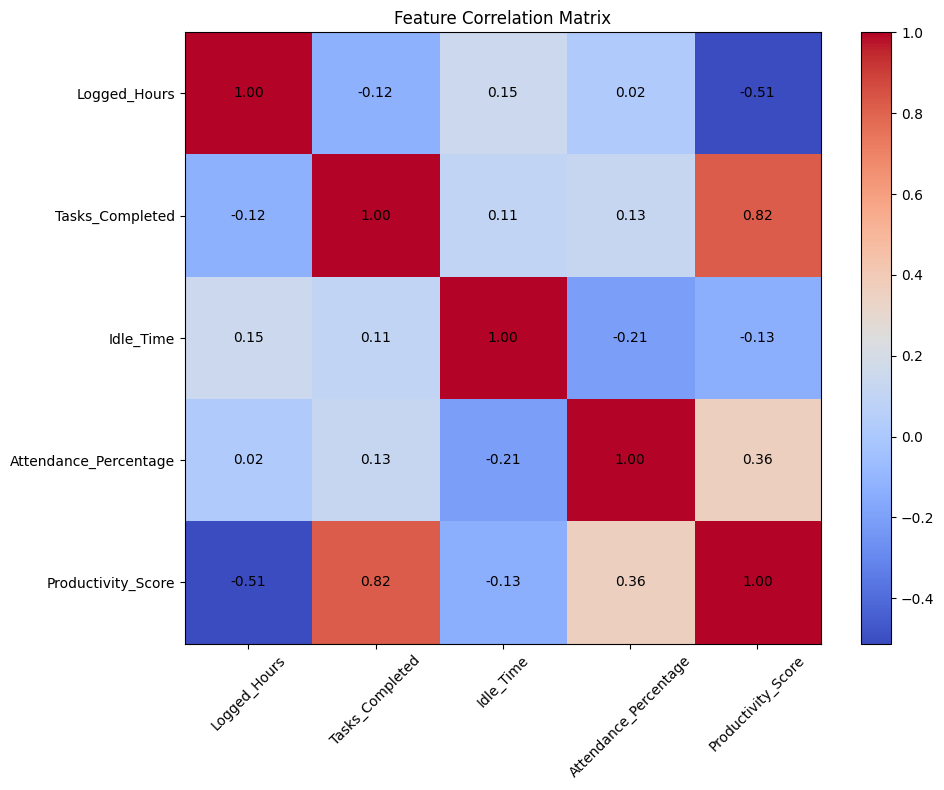

In [31]:
# Analyze correlations between features
correlation_matrix = df[['Logged_Hours', 'Tasks_Completed', 'Idle_Time', 'Attendance_Percentage', 'Productivity_Score']].corr()

# Create a heatmap for each pair of features
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add correlation values in the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [32]:

X = df[['Logged_Hours','Tasks_Completed','Idle_Time','Attendance_Percentage']]
y = df['Productivity_Score'] > df['Productivity_Score'].median()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9


## 6. Anomaly Detection

This is a critical point to identify sudden surges or drops

In [33]:

iso = IsolationForest(random_state=42)
df['Anomaly'] = iso.fit_predict(X)
df['Anomaly'].value_counts()


Anomaly
-1    39
 1    11
Name: count, dtype: int64

## 7. Visualization Examples

plot the results got


In [34]:

fig = px.bar(df, x='Employee_ID', y='Productivity_Score', color='Department')
fig.show()


## 8. Export Insights

In [35]:

df.to_excel("insights_report.xlsx", index=False)
print("Exported insights_report.xlsx")


Exported insights_report.xlsx
